In [1]:
import os
import shutil
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
root="./data"

In [4]:
working_dir = os.getcwd()

df = pd.read_csv(f"{root}/labels.csv")
# Splitting the data into features (X) and labels (y)
X = df['image_id']
y = df['DR_ICDR']

# Splitting the data into train (80%) and temporary data (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further splitting the temporary data into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

label_df = df[["image_id", "DR_ICDR"]]
print("Shape:", label_df.shape)
label_df.head()

df.loc[df.DR_ICDR == 2, "DR_ICDR"] = 1
df.loc[df.DR_ICDR == 3, "DR_ICDR"] = 1
df.loc[df.DR_ICDR == 4, "DR_ICDR"] = 1

print("Unique values:", pd.unique(df.DR_ICDR))


Shape: (16266, 2)
Unique values: [0 1]


In [6]:
# Splitting the data into features (X) and labels (y)
X = df['image_id']
y = df['DR_ICDR']

# Splitting the data into train (80%) and temporary data (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further splitting the temporary data into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [12]:
total_samples = len(X)import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate the X and y data to analyze the distribution
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Plotting the distribution of classes for each dataset
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=train_data, x='DR_ICDR')
plt.title('Train Data - Class Distribution')

plt.subplot(1, 3, 2)
sns.countplot(data=val_data, x='DR_ICDR')
plt.title('Validation Data - Class Distribution')

plt.subplot(1, 3, 3)
sns.countplot(data=test_data, x='DR_ICDR')
plt.title('Test Data - Class Distribution')

plt.tight_layout()
plt.show()

print("Shape of X_train:", X_train.shape, " - Percentage: {:.2f}%".format((len(X_train) / total_samples) * 100))
print("Shape of X_val:", X_val.shape, " - Percentage: {:.2f}%".format((len(X_val) / total_samples) * 100))
print("Shape of X_test:", X_test.shape, " - Percentage: {:.2f}%".format((len(X_test) / total_samples) * 100))
print("Shape of y_train:", y_train.shape, " - Percentage: {:.2f}%".format((len(y_train) / total_samples) * 100))
print("Shape of y_val:", y_val.shape, " - Percentage: {:.2f}%".format((len(y_val) / total_samples) * 100))
print("Shape of y_test:", y_test.shape, " - Percentage: {:.2f}%".format((len(y_test) / total_samples) * 100))


Shape of X_train: (13012,)  - Percentage: 80.00%
Shape of X_val: (1627,)  - Percentage: 10.00%
Shape of X_test: (1627,)  - Percentage: 10.00%
Shape of y_train: (13012,)  - Percentage: 80.00%
Shape of y_val: (1627,)  - Percentage: 10.00%
Shape of y_test: (1627,)  - Percentage: 10.00%


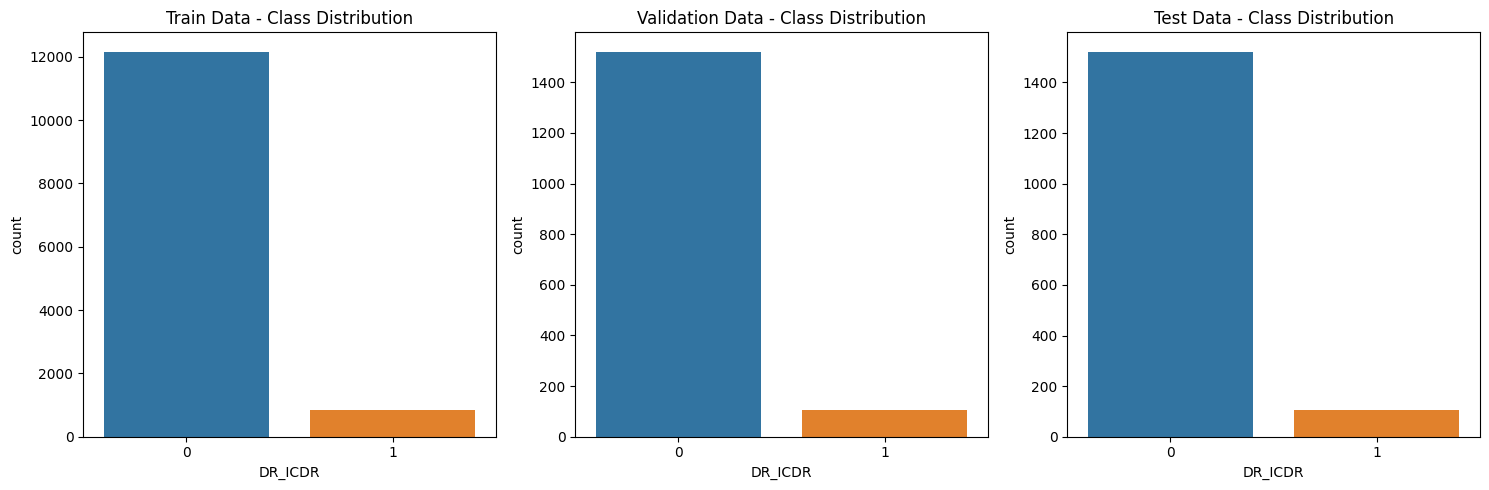

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate the X and y data to analyze the distribution
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Plotting the distribution of classes for each dataset
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=train_data, x='DR_ICDR')
plt.title('Train Data - Class Distribution')

plt.subplot(1, 3, 2)
sns.countplot(data=val_data, x='DR_ICDR')
plt.title('Validation Data - Class Distribution')

plt.subplot(1, 3, 3)
sns.countplot(data=test_data, x='DR_ICDR')
plt.title('Test Data - Class Distribution')

plt.tight_layout()
plt.show()


In [15]:
import shutil
import os

# Define the base directories
base_dir = "./data_brset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Create directories if they don't exist
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the class labels
classes = ['class_0', 'class_1']

# Function to organize images based on class labels
def organize_images(data, dataset_dir):
    for class_label in classes:
        class_data = data[data['DR_ICDR'] == int(class_label[-1])]  # Extract data for the current class
        class_dir = os.path.join(dataset_dir, class_label)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)
        for _, row in class_data.iterrows():
            image_path = os.path.join(f"{root}/fundus_photos", row['image_id'] + '.jpg')  # Adjust the path as per your image folder
            shutil.copy(image_path, class_dir)  # Copy the image to the respective class folder

# Organize train images
organize_images(train_data, train_dir)

# Organize validation images
organize_images(val_data, val_dir)

# Organize test images
organize_images(test_data, test_dir)
